# Pokemon Data Analysis

This project examines a data set from kaggle focused on [Pokemon data](https://www.kaggle.com/datasets/rounakbanik/pokemon). The project is a demonstration of learning from Cambridge Spark's Data Analysis Skills Bootcamp.

## Set up

We import pandas, numpy and matplotlib to import, clean, and analyse our data set.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

We can then import and view our data as a dataframe.

In [2]:
df = pd.read_csv('pokemon.csv')

And view its first five records:

In [3]:
df.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Or its info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## Processing the data set

As mentioned above, I'm only using a subset of columns from the dataset. My first move is to create a new dataframe which drops unnecessary columns.

I want to drop any column that starts with 'against_'. For example, 'against_bug'.

In [5]:
pokemon_df = df.copy()

columns_to_drop = df.filter(like='against_')
pokemon_df.drop(columns=columns_to_drop, inplace=True)

pokemon_df

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Now, I'll drop another set of columns, such as 'abilities' and 'base_egg_steps'.

My initial approach included the following:

```python 
columns_to_drop = ['abilities', 'base_egg_steps', 'classification', 'experience_growth']
pokemon_df.drop(columns=columns_to_drop, inplace=True)
```

However, I got an error here because of the spelling of classification. In the dataset, this was spelt as 'classfication'. Although convoluted, I decided to rename this column and then drop it. As this would give me a chance to showcase renaming.

In [6]:
pokemon_df.rename(columns={'classfication': 'classification'}, inplace=True)

columns_to_drop = ['abilities', 'base_egg_steps', 'classification', 'experience_growth', 'japanese_name', 'base_happiness']
pokemon_df.drop(columns=columns_to_drop, inplace=True)

pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   attack           801 non-null    int64  
 1   base_total       801 non-null    int64  
 2   capture_rate     801 non-null    object 
 3   defense          801 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               801 non-null    int64  
 6   name             801 non-null    object 
 7   percentage_male  703 non-null    float64
 8   pokedex_number   801 non-null    int64  
 9   sp_attack        801 non-null    int64  
 10  sp_defense       801 non-null    int64  
 11  speed            801 non-null    int64  
 12  type1            801 non-null    object 
 13  type2            417 non-null    object 
 14  weight_kg        781 non-null    float64
 15  generation       801 non-null    int64  
 16  is_legendary     801 non-null    int64  
dtypes: float64(3), i

I want the Pokemon number to the be first column in the dataset, and the second to be its name.

Next, I'll clean up values.

- I'd like 'is_legendary' to be `True` or `False`
- type2 should either be a type or the string 'none', currently we have some `NaN` values
- percentage male contains `NaN` values. I'd like to replace these with 0, if a pokemon is genderless, none of them are male!

In [7]:
pokemon_df['is_legendary'].replace({0: False, 1: True}, inplace=True)

pokemon_df['type2'].fillna('none', inplace=True)

pokemon_df['percentage_male'].fillna(0, inplace=True)

We now see significantly less null values when we check the table with `.info()`

In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   attack           801 non-null    int64  
 1   base_total       801 non-null    int64  
 2   capture_rate     801 non-null    object 
 3   defense          801 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               801 non-null    int64  
 6   name             801 non-null    object 
 7   percentage_male  801 non-null    float64
 8   pokedex_number   801 non-null    int64  
 9   sp_attack        801 non-null    int64  
 10  sp_defense       801 non-null    int64  
 11  speed            801 non-null    int64  
 12  type1            801 non-null    object 
 13  type2            801 non-null    object 
 14  weight_kg        781 non-null    float64
 15  generation       801 non-null    int64  
 16  is_legendary     801 non-null    bool   
dtypes: bool(1), floa

Finally, I'll inspect and address the remaining null values:

In [9]:
null_vals_df = pokemon_df[['name', 'height_m', 'weight_kg']].copy()
null_vals_df = null_vals_df[null_vals_df['height_m'].isnull()]

print(len(null_vals_df))


20


Seeing that there are 20 missing entries and all of those have missing weight and height, I don't need to search for any other entries here.

Reading through [the discussion](https://www.kaggle.com/datasets/rounakbanik/pokemon/discussion/115718) from Kaggle helped shine light on why these values were missing. (And also a limitation of the data set – that stats come from the Alolan version and not the original games).

Now, my most sensible approach seemed to be to fill in these values from another source (Serebii / Bulbapedia).

There's a couple of ways I could do this:
1. Referencing specific names
2. Collecting all heights and all weights into lists and zipping those with the df

The first is the most likely to avoid inputting erroneous data but is tedious. The second will be much faster to code but more likely to result in mistakes. I decided to go with the second approach 😜

In [10]:
heights = [0.3, 0.7, 0.8, 0.6, 1, 0.6, 1.1, 0.2, 0.7, 0.4, 1, 0.4, 1, 1.4, 0.9, 1.2, 2, 1.0, 0.5, 0.8]
weights = [3.5, 18.5, 30, 12, 29.5, 9.9, 19.9, 0.8, 33.3, 4.2, 32, 20, 105, 300, 30, 30, 120, 45, 9, 25]

# Resetting the index for smooth zipping. Otherwise, the index is pokedex number and the values don't match up
null_vals_df = null_vals_df.reset_index(drop=True)

for i, (height, weight) in enumerate(zip(heights, weights)):
    null_vals_df.at[i, 'height_m'] = height
    null_vals_df.at[i, 'weight_kg'] = weight
    
merged_df = pokemon_df.merge(null_vals_df, on='name', suffixes=('_original', '_updated'))

for i in range(20):
    pokemon_name = merged_df.iloc[i]['name']
    row = pokemon_df.loc[pokemon_df['name'] == pokemon_name]['pokedex_number'] - 1
    pokemon_df.loc[row, 'height_m'] = merged_df.iloc[i]['height_m_updated']
    pokemon_df.loc[row, 'weight_kg'] = merged_df.iloc[i]['weight_kg_updated']

There's a fair amount of wangjangling going on above. Let me try to explain what's going on.

First, we set up two lists for the missing heights and weights.

Next, we're gonna `reset_index()` on the existing df which contains those records with missing heights and weights. This is so that we can get the lists to match up. The default index is from the original df (corresponds to pokedex order and is pokedex number minus one).

We then merge our pokemon_df with the null_vals_df on the records with names in common (i.e. the names of those with missing height/weight). For the duplicate columns we add suffixes to differentiate between the old value (NaN) and the new value.

Finally, looping from 0 to 19, we extract the pokemon's name from the current row in merged_df. We find the corresponding row in the pokemon_df DataFrame using `pokemon_df.loc[pokemon_df['name'] == pokemon_name]` and store the pokedex_number - 1, i.e. the original index. We then update the height and weight columns using `.loc` with the row number and column name with a value referenced from merged_df.

## Data Analysis

For this project, I'd like to look at things like:
- Average statistics per type, or generation
- Distribution of stats amongst a type
- Representing stats per type (e.g. with a bar chart)
- Std deviation amongst a set of stats

## Distribution

Determining distribution of defense stat

In [11]:
mean_def = pokemon_df['defense'].mean()
median_def = pokemon_df['defense'].median()
mode_def = pokemon_df['defense'].mode()

print(f'Mean: {mean_def}, Median: {median_def}, Mode: {mode_def}')

Mean: 73.00873907615481, Median: 70.0, Mode: 0    50
Name: defense, dtype: int64


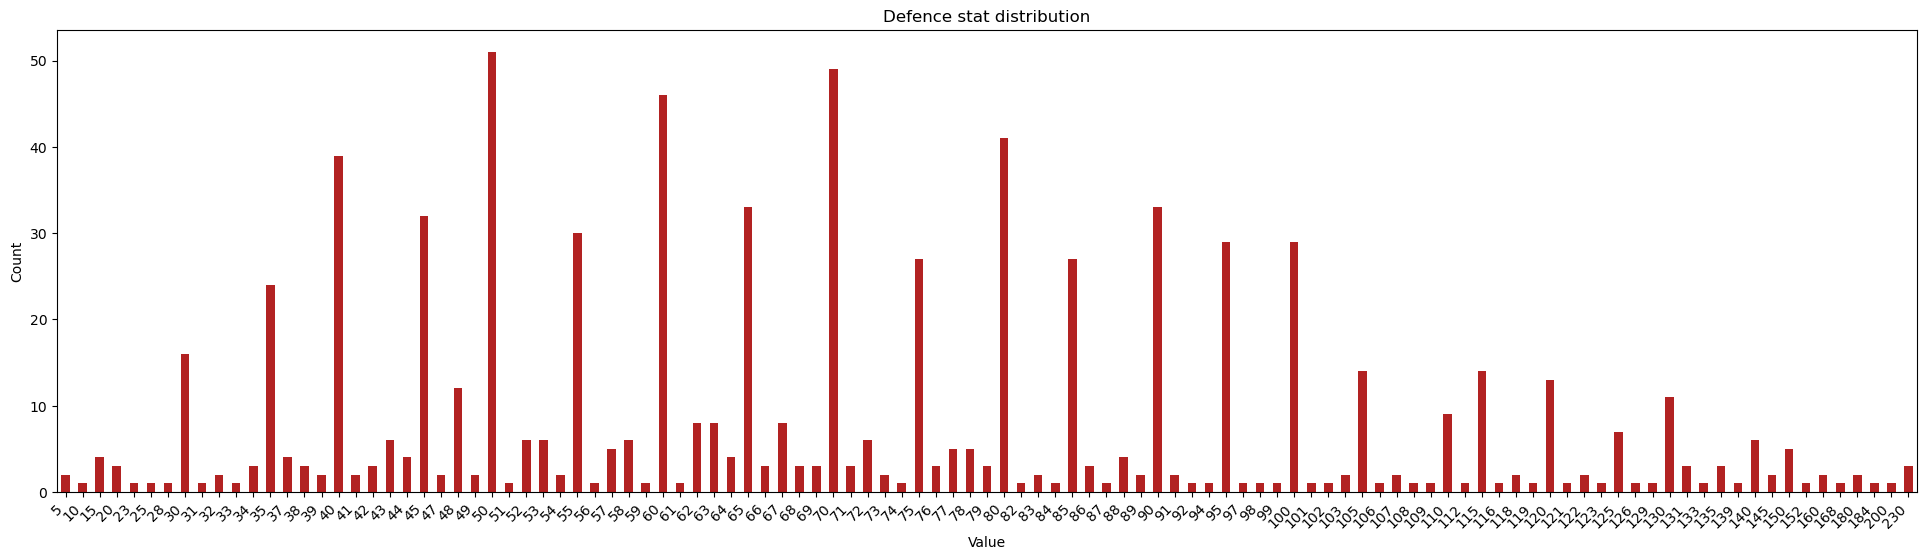

In [12]:
defence_counts = pokemon_df['defense'].value_counts().sort_index()

def barchart(size, data, x, y, title):
    plt.figure(figsize=size)
    data.plot(kind='bar', color='firebrick')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
barchart((24,6), defence_counts, 'Value', 'Count', 'Defence stat distribution')

The graph above is neat enough. It could be clearer by arranging values into 'intervals' of 10 (e.g. 0 - 10, 10 - 20, etc). This may help to smooth out the curve.

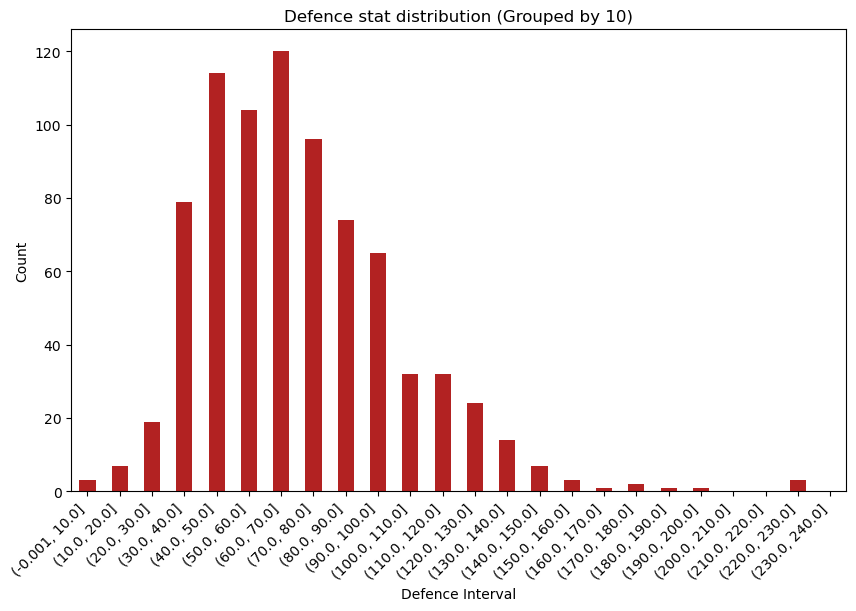

In [13]:
defence_intervals = np.arange(0, pokemon_df['defense'].max() + 11, 10)
defence_counts = pokemon_df['defense'].value_counts(bins=defence_intervals).sort_index()

barchart((10, 6), defence_counts, 'Defence Interval', 'Count', 'Defence stat distribution (Grouped by 10)')


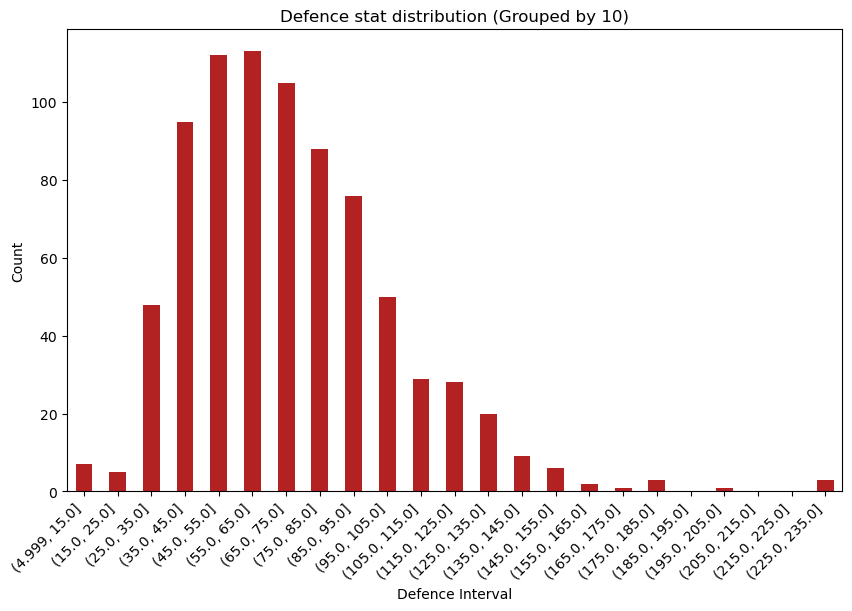

In [14]:
defence_intervals = np.arange(pokemon_df['defense'].min(), pokemon_df['defense'].max() + 11, 10)
defence_counts = pokemon_df['defense'].value_counts(bins=defence_intervals).sort_index()

barchart((10, 6), defence_counts, 'Defence Interval', 'Count', 'Defence stat distribution (Grouped by 10)')

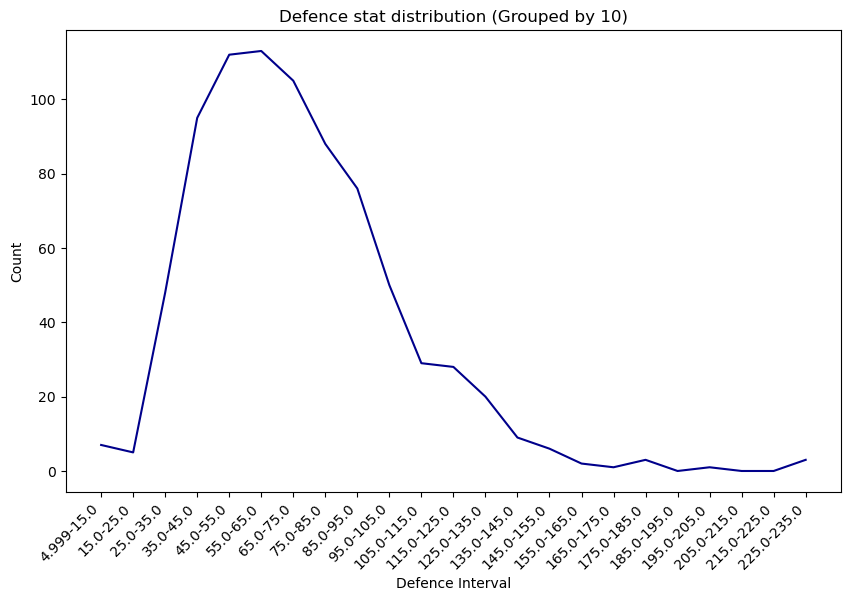

In [15]:
def linechart(size, data, x, y, title):
    plt.figure(figsize=size)
    data.plot(kind='line', color='darkblue')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(range(len(data.index)), [f'{interval.left}-{interval.right}' for interval in data.index], rotation=45, ha='right')
    plt.show()
    
linechart((10, 6), defence_counts, 'Defence Interval', 'Count', 'Defence stat distribution (Grouped by 10)')

In [16]:
# Calculate standard error
defence_std_error = defence_counts.std()

# Display standard error
print(f"Standard Error: {defence_std_error}")

Standard Error: 41.57758593489902


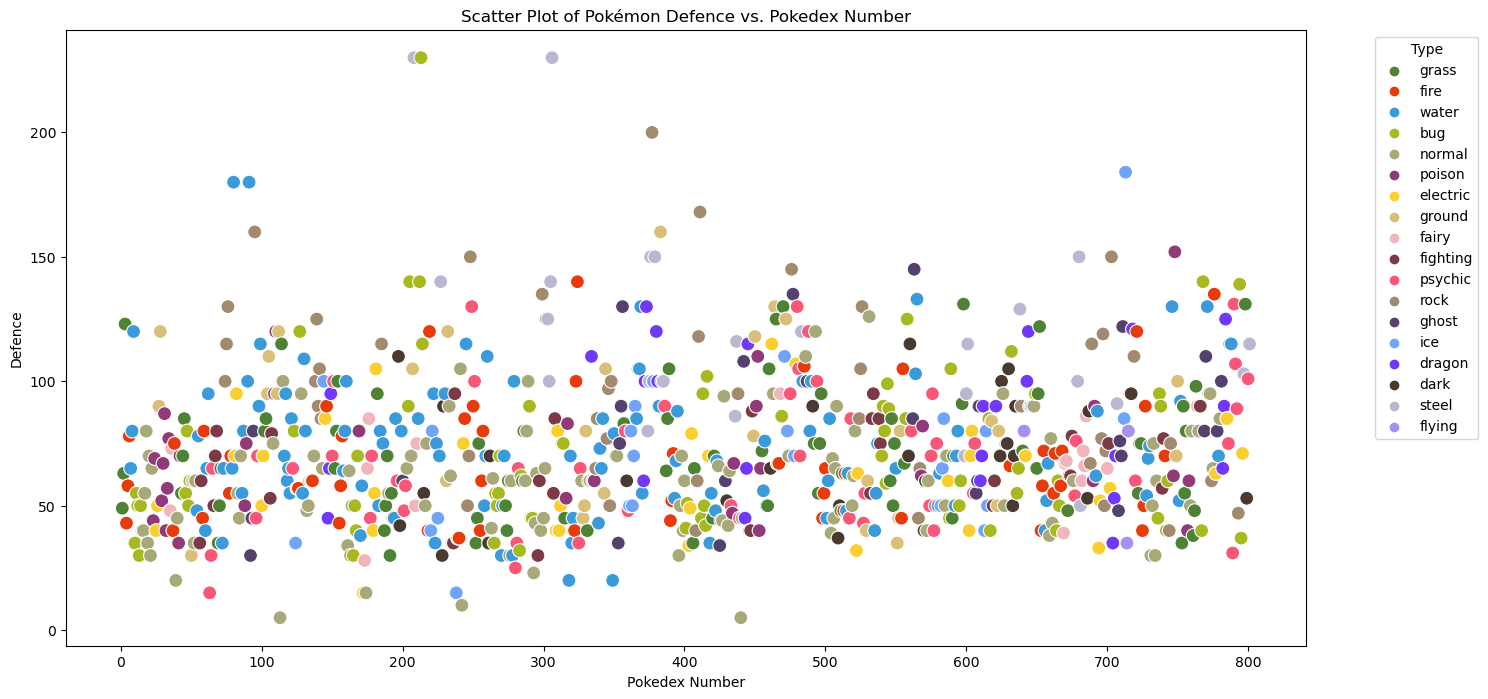

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'type' is a column in your pokemon_df containing Pokémon types
pokemon_types = ['normal', 'fire', 'water', 'grass', 'flying', 'fighting', 'poison', 'electric', 'ground', 'rock', 'psychic', 'ice', 'bug', 'ghost', 'steel', 'dragon', 'dark', 'fairy']

# Map each Pokémon type to a color
type_color_map = {
    'grass': '#4e8234',
    'fire': '#e73b0c',
    'water': '#3b9ad9',
    'electric': '#f9cf30',
    'psychic': '#f85778',
    'normal': '#a9a878',
    'fighting': '#7c3946',
    'flying': '#a890f0',
    'ground': '#d9bf77',
    'rock': '#a18a6d',
    'bug': '#a8b820',
    'poison': '#923978',
    'steel': '#b8b8d0',
    'ghost': '#55416d',
    'dark': '#49392f',
    'dragon': '#7038f8',
    'ice': '#70a4f9',
    'fairy': '#f0b6bc',
}

# Add a 'color' column to pokemon_df based on the Pokémon type
# pokemon_df['color'] = pokemon_df['type1'].map(type_color_map)

# Plot the scatter graph
plt.figure(figsize=(16, 8))
sns.scatterplot(data=pokemon_df, x='pokedex_number', y='defense', hue='type1', palette=type_color_map, s=100)
plt.title('Scatter Plot of Pokémon Defence vs. Pokedex Number')
plt.xlabel('Pokedex Number')
plt.ylabel('Defence')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Having a defence value higher than 125
- Top 25 Pokemon by defence